# Анализ модели

In [1]:
import math
import numpy as np
import pandas as pd

%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
import NotebookLoader
import Physics as ph
import SSM18 as s

importing Jupyter notebook from Physics.ipynb
Physics version 1.12 11.07.2020
importing Jupyter notebook from SSM18.ipynb
SSM18 version 1.8 11.07.2020


In [3]:
def load_model(epoch):
#     filename = 'FromCenter/1epoch%.02d.csv' % epoch
    filename = 'Mass/3epoch%.02d.csv' % epoch
    return pd.read_csv(filename)

In [4]:
epoch = 0
df = load_model(epoch)

In [5]:
df

,Unnamed: 0,Mass,Radius,Temperature,Density,Luminosity,Hydrogen,Opacity,Convection,Pressure,Velocity
0,0,0.000000e+00,0.000000e+00,1.451000e+07,90.073858,0.000000e+00,0.732,1.445415,1.0,1.794120e+17,1.208753e-10
1,1,1.990588e+30,1.744864e+09,1.439966e+07,89.041127,3.337100e+31,0.732,1.461410,0.0,1.760063e+17,1.149243e-10
2,2,3.981176e+30,2.201408e+09,1.433513e+07,88.430509,6.557975e+31,0.732,1.470834,0.0,1.740159e+17,1.115997e-10
3,3,5.971765e+30,2.522902e+09,1.428116e+07,87.917179,9.694220e+31,0.732,1.478767,0.0,1.723544e+17,1.089033e-10
4,4,7.962353e+30,2.779701e+09,1.423310e+07,87.458197,1.275919e+32,0.732,1.485871,0.0,1.708776e+17,1.065640e-10
...,...,...,...,...,...,...,...,...,...,...,...
996,996,1.982626e+33,4.139110e+10,9.072824e+05,0.203440,3.562824e+33,0.732,1.486150,0.0,2.533749e+13,1.087433e-21
997,997,1.984616e+33,4.188541e+10,8.016714e+05,0.166783,3.562824e+33,0.732,1.191579,0.0,1.835411e+13,2.401102e-22
998,998,1.986607e+33,4.249698e+10,6.818832e+05,0.125189,3.562824e+33,0.732,0.907523,0.0,1.171825e+13,3.241820e-23
999,999,1.988598e+33,4.336443e+10,5.328578e+05,0.075302,3.562824e+33,0.732,0.639191,0.0,5.508131e+12,1.428180e-24


In [28]:
x = df['Hydrogen'].values
r = df['Radius'].values
m = df['Mass'].values
t = df['Temperature'].values
d = df['Density'].values
l = df['Luminosity'].values
p = df['Pressure'].values
k = df['Opacity'].values
c = df['Convection'].values

In [29]:
r1 = r/s.R
m1 = m/s.M

In [30]:
r1[-1], m1[-1]

(0.6768869522604728, 1.0002955663729016)

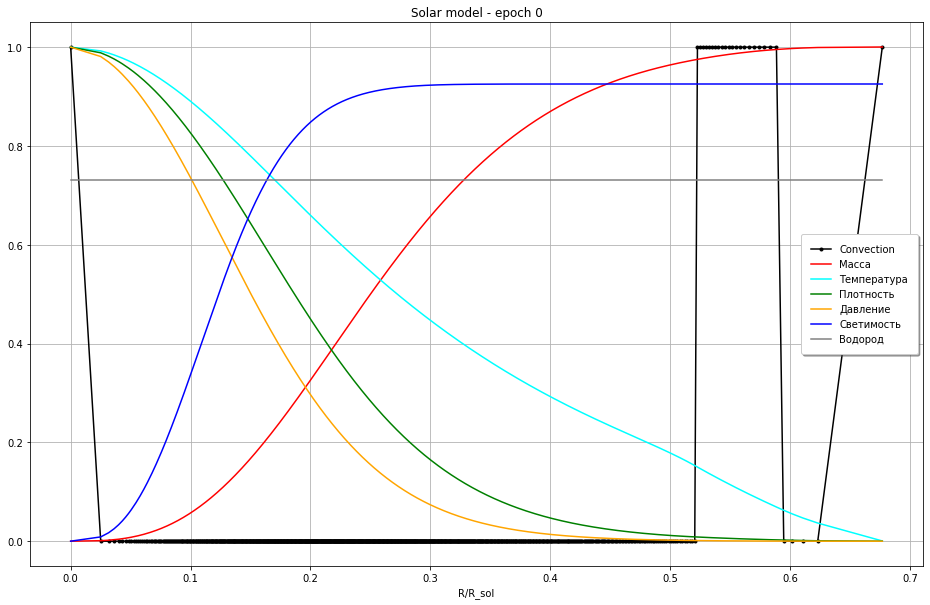

In [31]:
plt.figure(figsize=(16, 10))
ax = plt.axes()
plt.plot(r1, c, color='black', marker='.', label='Convection')
plt.plot(r1, m/s.M, color='red', label='Масса')
plt.plot(r1, t/t[0], color='cyan', label='Температура')
# plt.plot(r1[1:], d1[1:]/d[0], color='green', label='Плотность')
plt.plot(r1, d/d[0], color='green', label='Плотность')
plt.plot(r1, p/p[0], color='orange', label='Давление')
plt.plot(r1, l/s.L, color='blue', label='Светимость')
plt.plot(r1, x, color='gray', label='Водород')
# plt.plot(r1, p1/p1[0], color='black', marker='.', label='Давление')
# plt.xlim(-0.1,0.1)
# plt.ylim(-0.1, 0.1)
plt.xlabel('R/R_sol')
plt.ylabel('')
plt.title('Solar model - epoch %d' % epoch)
ax.grid(b=True, which='both')
ax.legend(fancybox=True, framealpha=1, shadow=True, borderpad=1);

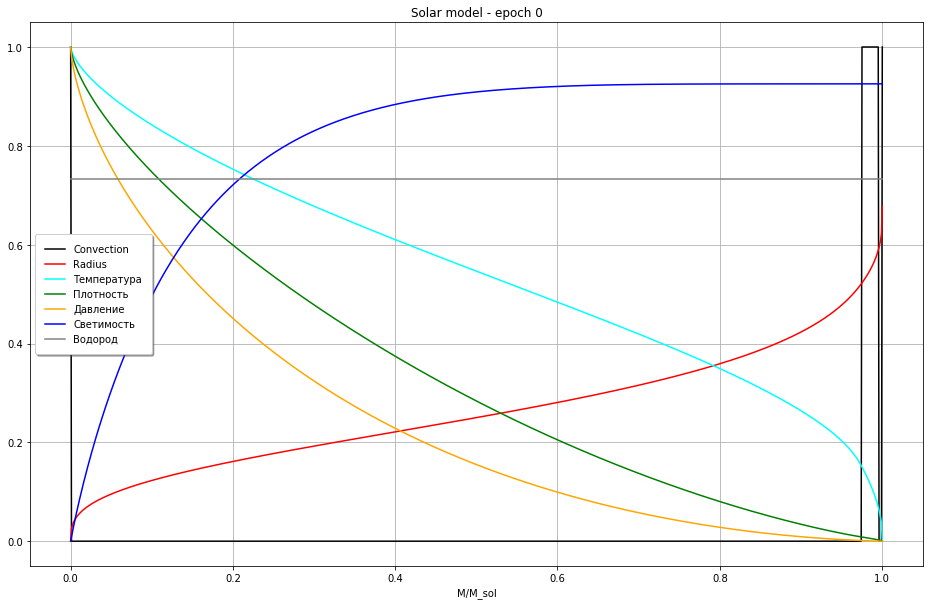

In [32]:
plt.figure(figsize=(16, 10))
ax = plt.axes()
plt.plot(m1, c, color='black', label='Convection')
plt.plot(m1, r1, color='red', label='Radius')
plt.plot(m1, t/t[0], color='cyan', label='Температура')
plt.plot(m1, d/d[0], color='green', label='Плотность')
plt.plot(m1, p/p[0], color='orange', label='Давление')
plt.plot(m1, l/s.L, color='blue', label='Светимость')
plt.plot(m1, x, color='gray', label='Водород')
# plt.plot(r1, p1/p1[0], color='black', marker='.', label='Давление')
# plt.xlim(-0.1,0.1)
# plt.ylim(-0.1, 0.1)
plt.xlabel('M/M_sol')
plt.ylabel('')
plt.title('Solar model - epoch %d' % epoch)
ax.grid(b=True, which='both')
ax.legend(fancybox=True, framealpha=1, shadow=True, borderpad=1);

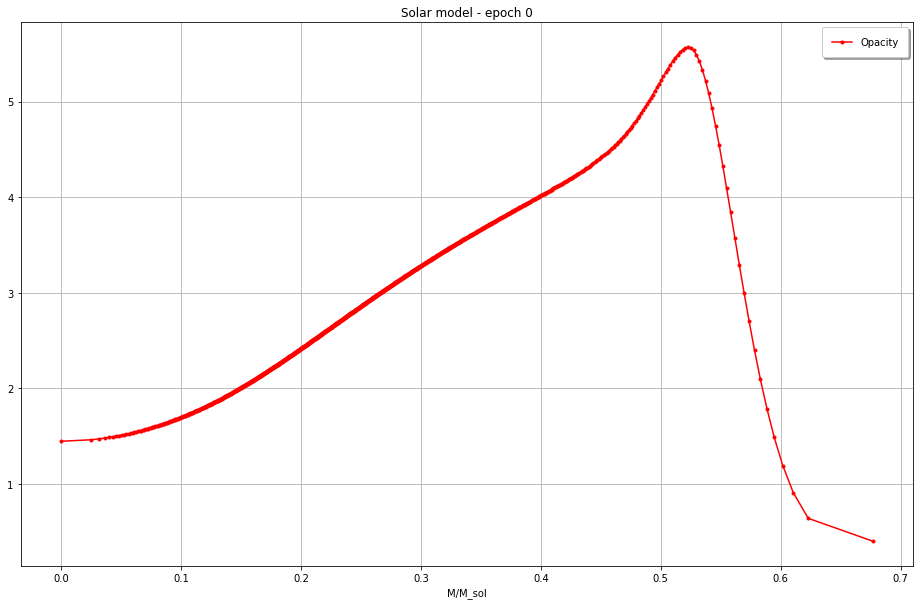

In [33]:
plt.figure(figsize=(16, 10))
ax = plt.axes()
# plt.plot(r1, c[::10], color='black', label='Convection')
plt.plot(r1, k, color='red', marker='.', label='Opacity')
# plt.xlim(-0.1,0.1)
# plt.ylim(-0.1, 0.1)
plt.xlabel('M/M_sol')
plt.ylabel('')
plt.title('Solar model - epoch %d' % epoch)
ax.grid(b=True, which='both')
ax.legend(fancybox=True, framealpha=1, shadow=True, borderpad=1);

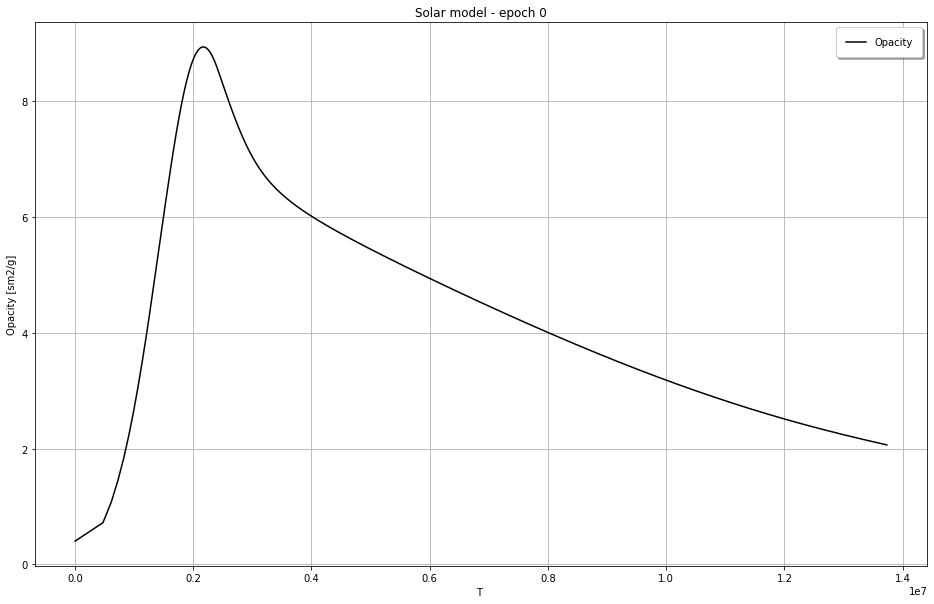

In [13]:
plt.figure(figsize=(16, 10))
ax = plt.axes()
plt.plot(t, k, color='black', label='Opacity')
# plt.xlim(-0.1,0.1)
# plt.ylim(-0.1, 0.1)
plt.xlabel('T ')
plt.ylabel('Opacity [sm2/g]')
plt.title('Solar model - epoch %d' % epoch)
ax.grid(b=True, which='both')
ax.legend(fancybox=True, framealpha=1, shadow=True, borderpad=1);

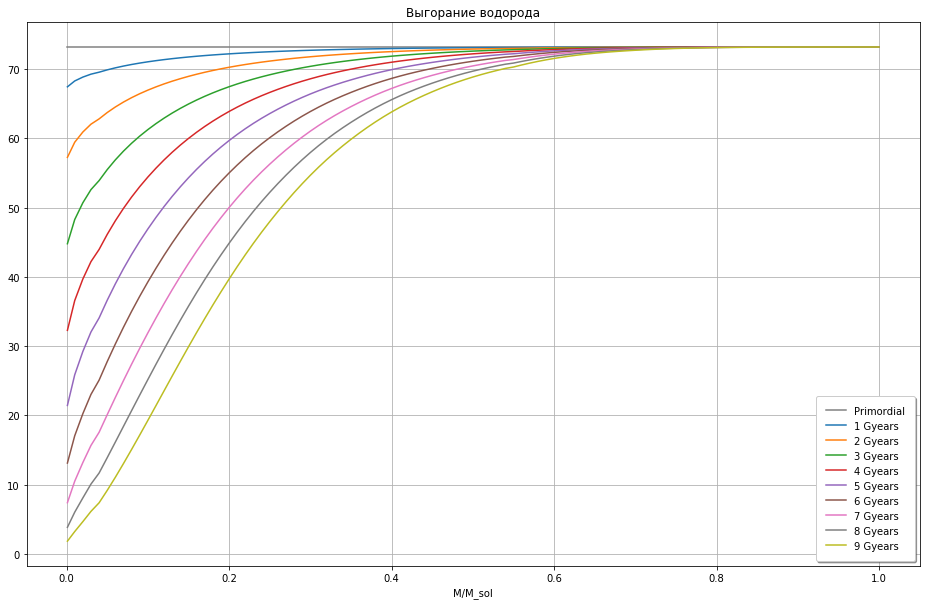

In [58]:
h = 100.*x[::10]
v = df['Velocity'].values[::10]
plt.figure(figsize=(16, 10))
ax = plt.axes()
plt.plot(m1, h, color='gray', label='Primordial')
for ep in range(1,10):
    h = h*np.exp(-1e9*v*ep)
    plt.plot(m1, h, label='%d Gyears' % ep)
plt.xlabel('M/M_sol')
plt.ylabel('')
plt.title('Выгорание водорода')
ax.grid(b=True, which='both')
ax.legend(fancybox=True, framealpha=1, shadow=True, borderpad=1);